**Pytorch Workflow**

In [1]:
import torch
from torch import nn  #contains all of the pytorch building blocks for neural nets
import matplotlib.pyplot as plt 


**Data Preaparing and Loading**

In [2]:
#creating a simple dataset using the linear regression formula

weight = 0.7
bias = 0.3

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1) #unsqueeze adds an extra dimension to the tensor
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

**splitting our data into trainig and test sets**

In [4]:
#creata a train and test split
train_split = int(0.8 * len(X))  #80% of the data for training

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

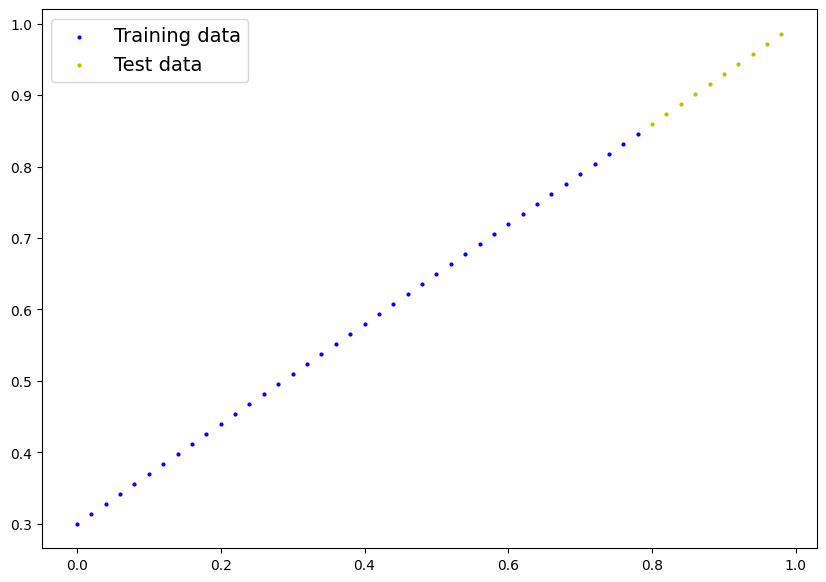

In [6]:
def plot_predictions(train_data=X_train,train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """plot training data, test data and compare predictions"""

    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c="y", s=4, label="Test data")
     
    #are there predictions
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")  
    plt.legend(prop={"size":14})  
    
plot_predictions()

In [7]:
#building a model

#create linera regression model class

from torch import nn

class LinearRegression(nn.Module):  #almost everything in pytorch is a subclass of nn.Module
     
    def __init__(self): 
        super().__init__() #initializing the parent class nn.Module or initializes nn.Module
        # self.linear_layer = nn.Linear(in_features=1, out_features=1)
        

        self.weights = nn.Parameter(torch.rand(1,
        requires_grad=True,
        dtype=torch.float))

        self.bias = nn.Parameter(torch.rand(1,
        requires_grad=True,
        dtype=torch.float))

        #forward method to define the forward pass or computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

**Pytorch Model Building essentials**
torch.nn
torch.nn.parameter
torch.nn.Module
torch.optim
def forward

In [8]:
#checking the contents of our model
torch.manual_seed(42)

#instance of the model 
model_0  = LinearRegression()
#model_0
list(model_0.parameters())  

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [9]:
model_0.state_dict()  #state_dict is a dictionary that contains all the parameters of the model

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [10]:
weight, bias

(0.7, 0.3)

**Making Predictions with our random model using inference model**

In [11]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [12]:
#making prediction using torch.inference_mode() 
with torch.inference_mode():  #disables gradient tracking 
    y_preds = model_0(X_test)

y_preds

#we can also do something similar with torch.no_grad()

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

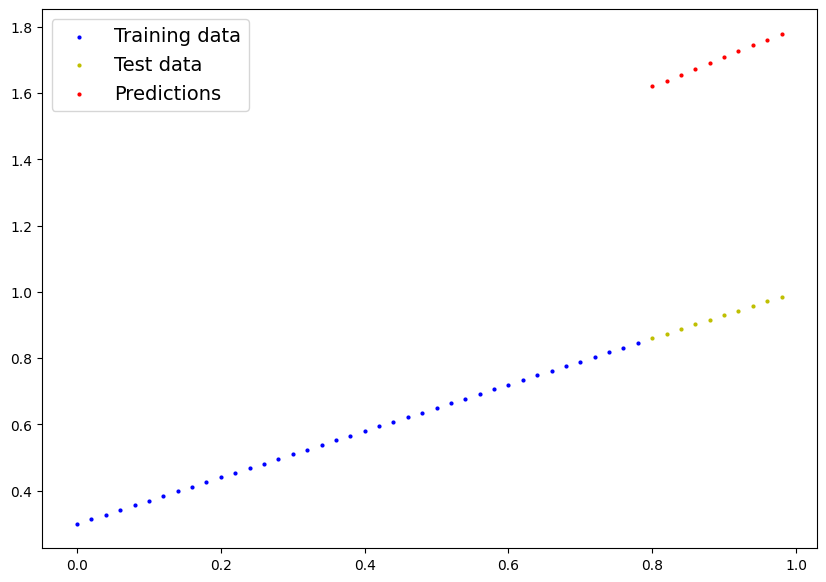

In [14]:
plot_predictions(predictions=y_preds)

**Setting up an Optimizer and Loss Function**

In [15]:
#setup loss function 
loss_fn = nn.L1Loss() #mean absolute error

#setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [16]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

**Building a Training Loop and Testing Loop**

In [17]:
torch.manual_seed(42)

epochs = 100 

#tracking experiments
epoch_count = []
loss_values = []
test_loss_values = []   

#loop through the data
for epoch in range(epochs):
    model_0.train()  #set the model to training mode

    #forward pass
    y_pred = model_0(X_train)

    #calculate the loss
    loss = loss_fn(y_pred, y_train)
    # print(f"loss: {loss}")

    #optimizer zero grad
    optimizer. zero_grad()

    #perform backpropagation on the loss with respect to the parameters of the model
    loss.backward() #calculate the gradients

    #step the optimizer (perform gradient descent)
    optimizer.step() #update the parameters 


    model_0.eval() #turns off gradient tracking

    #testing code

    with torch.inference_mode(): #this turns off  gradient tracking
        
        test_pred = model_0(X_test) #forward pass

       # calculate the loss
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)    
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss.item()} | Test loss: {test_loss.item()}")
            print(model_0.state_dict())

Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526392936707
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290427446365356
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.34045934677124023 | Test loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.2252494841814041 | Test loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Loss: 0.1100396141409874 | Test loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Loss: 0.009724989533424377 | Test loss: 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])

/var/folders/wt/g5_3538j7b32118b5vvx7c1h0000gn/T/ipykernel_35122/3355312938.py:6: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")


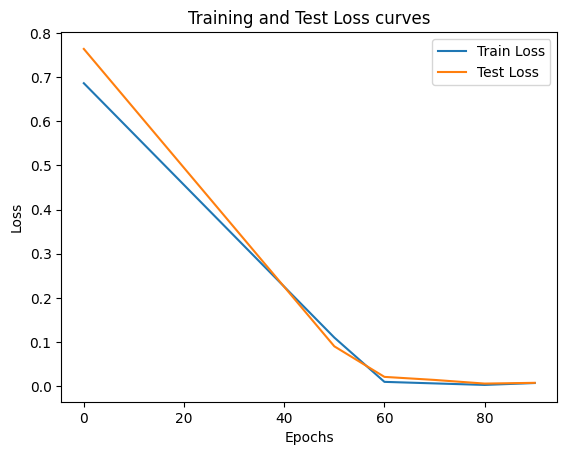

In [18]:
import numpy as np

#plot the loss curves
#epoch_count, loss_values, test_loss_values

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

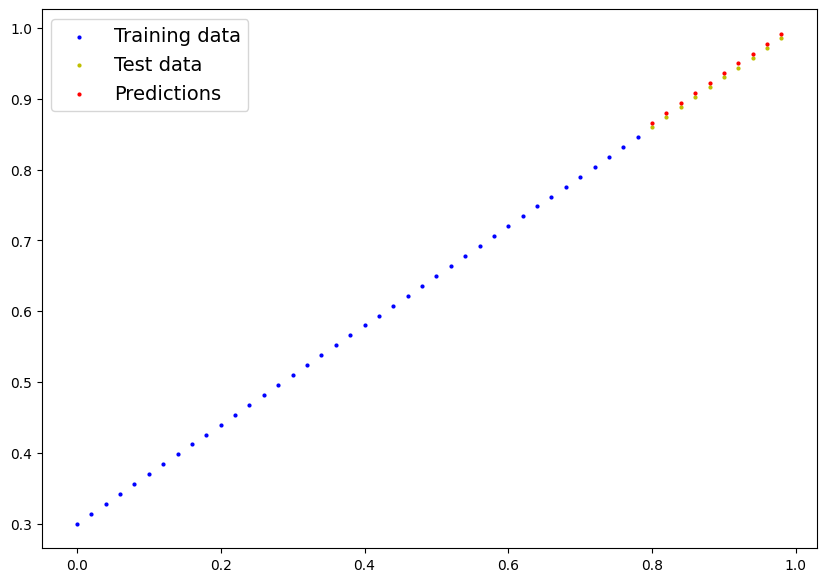

In [20]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    plot_predictions(predictions=y_preds_new)


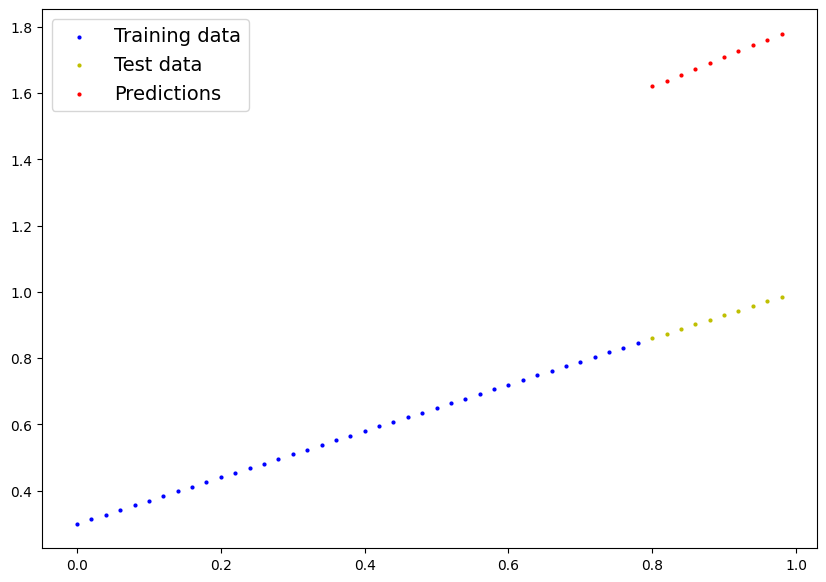

In [21]:
plot_predictions(predictions=y_preds)

In [22]:
#saving the model

from pathlib import Path

#create model directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True) #create parent directories if they don't exist

#create model save path
MODEL_NAME = "workflow_regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state_dict  
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [24]:
#torch.load("model/workflow_regression.pth", weights_only=True)

# to load the saved state_dict we have to instanciate a new instance of our model class
loaded_model_0 = LinearRegression()

#load the saved state_dict of the model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))    

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [26]:
#make some predictin with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [27]:
#make some predictin with our loaded model
model_0.eval()
with torch.inference_mode():
    y_preds = loaded_model_0(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [28]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])